In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('BTC-USD.csv')

In [2]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3223,2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756
3224,2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470
3225,2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074
3226,2023-07-18,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,13138897269


In [3]:
# 결측치 여부 확인 
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj Close  3228 non-null   float64
 6   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 176.7+ KB


In [5]:
# Date 열을 datetime 형식으로 변환

df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3228 non-null   datetime64[ns]
 1   Open       3228 non-null   float64       
 2   High       3228 non-null   float64       
 3   Low        3228 non-null   float64       
 4   Close      3228 non-null   float64       
 5   Adj Close  3228 non-null   float64       
 6   Volume     3228 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 176.7 KB


In [7]:
print(df.shape)

(3228, 7)


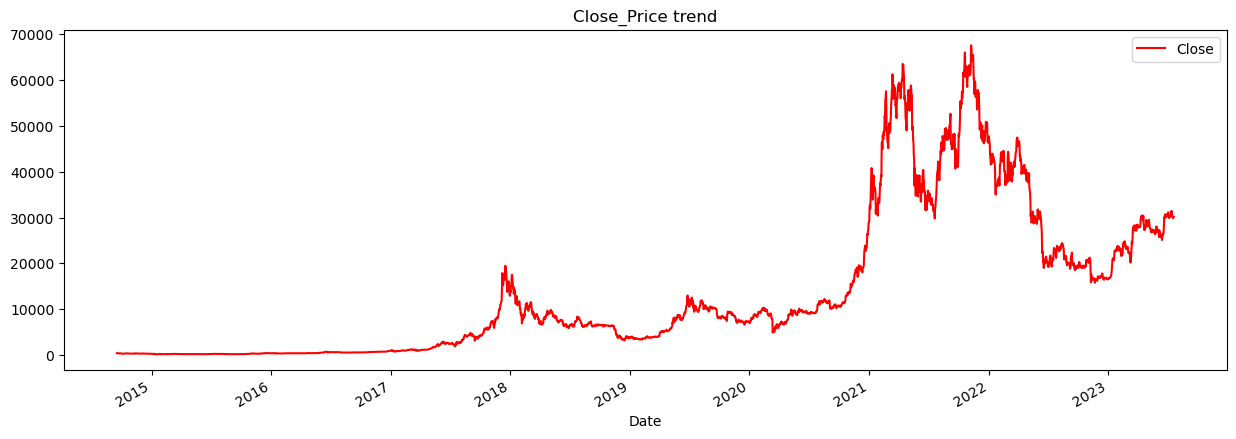

In [8]:
# 연도별 Close(종가) trend 시각화

df.plot(style='', x='Date',y='Close',figsize=(15,5),color='red',label='Close')

plt.xlabel('Date')
plt.title('Close_Price trend')
plt.legend()
plt.show()

### 데이터셋 분리

2022년도 이전을 학습 데이터로, 2022년도 이후를 테스트 데이터로 사용하고자함

In [9]:
# 데이터셋 구분

split_date = pd.to_datetime('2022-01-01')
df_train = df.loc[df['Date'] < split_date].copy()
df_test = df.loc[df['Date'] >= split_date].copy()

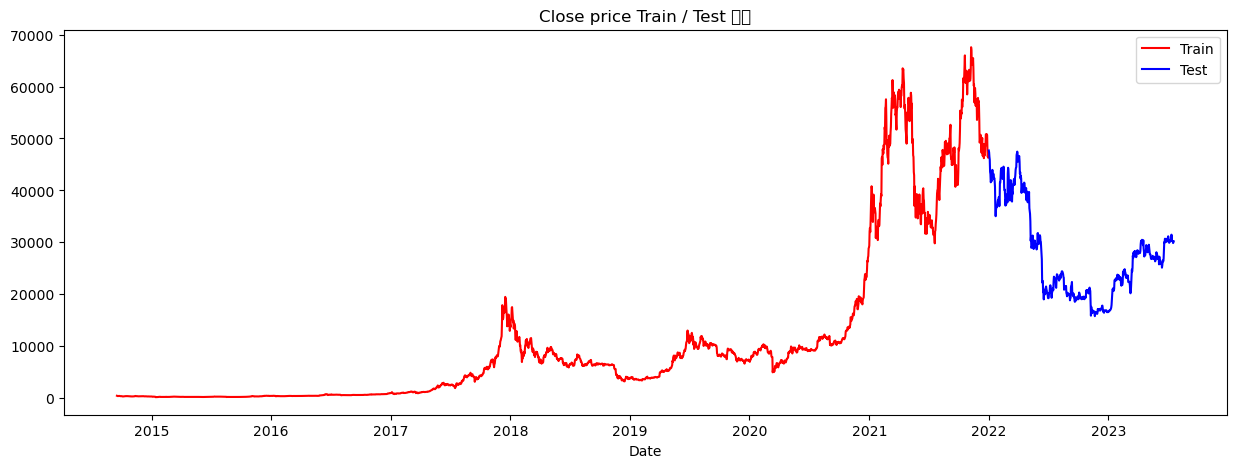

In [10]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(df_train['Date'],df_train['Close'],label='Train',color='red')
plt.plot(df_test['Date'],df_test['Close'],label='Test',color='blue')

plt.xlabel('Date')
plt.title('Close price Train / Test 분리')
plt.legend()
plt.show()

In [11]:
total_samples = len(df)
train_samples = len(df_train)
test_samples = len(df_test)

train_ratio = train_samples / total_samples
test_ratio = test_samples / total_samples

print(f'학습 데이터 비율 : {train_ratio :.2%}')
print(f'테스트 데이터 비율 : {test_ratio :.2%}')

학습 데이터 비율 : 82.50%
테스트 데이터 비율 : 17.50%


### Time series feature 생성

In [12]:
# 피처 설정
def create_features(df, label=None):

    df['Date'] = pd.to_datetime(df['Date'])
    
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
        
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label :
        y = df[label]
        return X, y
    return X

In [13]:
X_train, y_train = create_features(df_train, label='Close')
X_test, y_test = create_features(df_test, label='Close')

df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0,2,3,9,2014,260,17,38
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0,3,3,9,2014,261,18,38
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0,4,3,9,2014,262,19,38
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0,5,3,9,2014,263,20,38
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,0,6,3,9,2014,264,21,38


RandomizedSearchCV를 이용해 하이퍼파라미터 설정 및 모델 학습

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'n_estimators':[50,100,150],
    'max_features':['sqrt','log2'],
    'max_depth' : [80,90,100],
    'min_samples_split':[5,10],
    'min_samples_leaf':[1,2,4]
}

rf = RandomForestRegressor(random_state = 1234)

rf_random = RandomizedSearchCV(estimator=rf,
                              param_distributions=rf_param_grid,
                              n_iter=50, cv=3, 
                               scoring='neg_mean_squared_error',
                               n_jobs=-1, verbose=1, return_train_score=True)

rf_random.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [80, 90, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [50, 100, 150]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [15]:
rf_best = rf_random.best_estimator_

y_pred = rf_best.predict(X_test)

모델 평가

In [16]:
# 모델 평가

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test,y_pred)

print(f'테스트 데이터셋 MAE : {np.abs(y_pred - y_test).mean(): .3f}')
print(f'테스트 데이터셋 MSE : {mse:.3f}')
print(f'테스트 데이터셋 RMSE : {np.sqrt(mse): .3f}')

테스트 데이터셋 MAE :  18990.498
테스트 데이터셋 MSE : 485640960.627
테스트 데이터셋 RMSE :  22037.263


In [17]:
df_result = pd.DataFrame({'Pred': y_pred, 'Real': y_test})
df_result['Date'] = df_test['Date']
df_result.set_index('Date', inplace=True)
df_result.head()

,Pred,Real
Date,,
2022-01-01,34585.319944,47686.812500
2022-01-02,33983.806513,47345.218750
2022-01-03,35520.671478,46458.117188
2022-01-04,35403.409386,45897.574219
2022-01-05,35390.039429,43569.003906


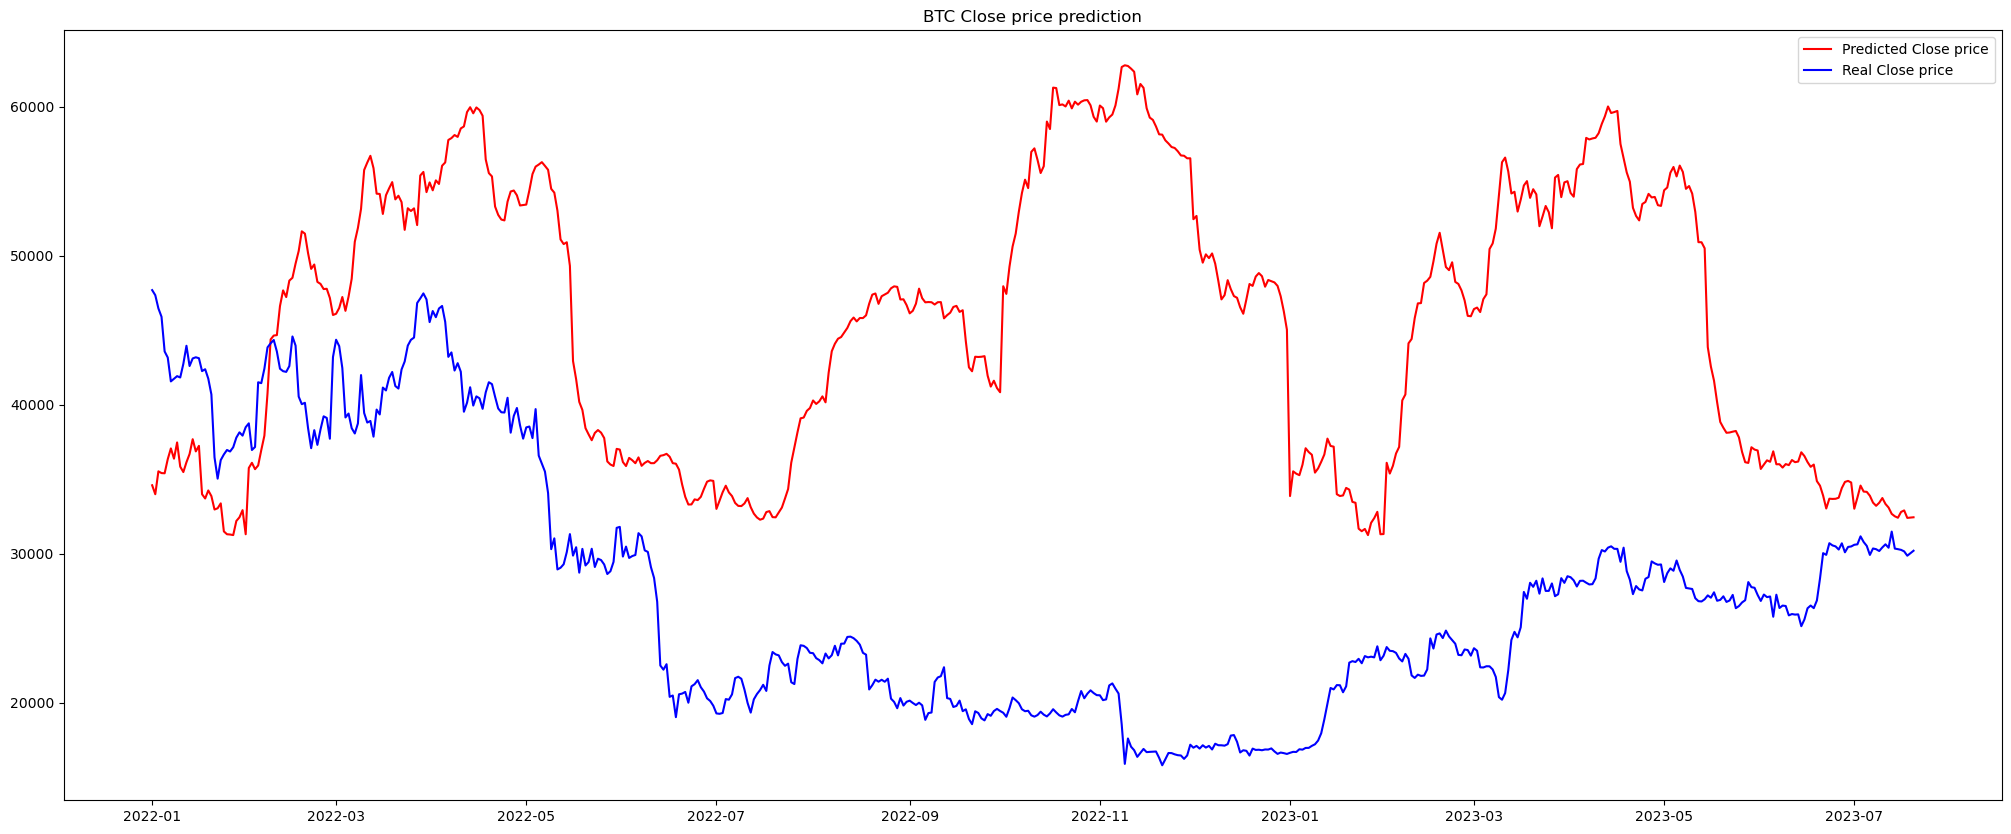

In [18]:
plt.figure(figsize=(25,10))

plt.plot(df_result['Pred'], color='red', label='Predicted Close price')
plt.plot(df_result['Real'], color='blue', label='Real Close price')
plt.title('BTC Close price prediction')

plt.legend()
plt.show()